# Morse theory-based transformations Stochastic Gradient Descent (SGD) - Eric Jiang

The code for ADAM optimizer

In [1]:
import numpy as np

class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.t = 0

    def update(self, w, dw):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * dw
        self.v = self.beta2 * self.v + (1 - self.beta2) * (dw ** 2)

        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        w = w - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return w

# Generate random data
np.random.seed(42)
x = np.random.randn(100)
y = 2 * x + 3 + np.random.randn(100) * 0.5  # true slope is 2, intercept is 3

# Initialize parameters
m = 0.0
b = 0.0

# Create optimizer
optimizer_m = AdamOptimizer(learning_rate=0.1)
optimizer_b = AdamOptimizer(learning_rate=0.1)

# Training loop
for epoch in range(1000):
    # Predicted values
    y_pred = m * x + b
    # Compute gradients
    grad_m = np.mean(2 * (y_pred - y) * x)
    grad_b = np.mean(2 * (y_pred - y))
    # Update parameters
    m = optimizer_m.update(m, grad_m)
    b = optimizer_b.update(b, grad_b)

    if epoch % 100 == 0:
        loss = np.mean((y_pred - y) ** 2)
        print(f"Epoch {epoch}, Loss: {loss:.4f}, m: {m:.4f}, b: {b:.4f}")

# Final parameters and loss
print(f"Final parameters - Slope: {m:.4f}, Intercept: {b:.4f}")


Epoch 0, Loss: 11.1166, m: 0.1000, b: 0.1000
Epoch 100, Loss: 0.2213, m: 1.9184, b: 2.9869
Epoch 200, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 300, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 400, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 500, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 600, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 700, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 800, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 900, Loss: 0.2209, m: 1.9284, b: 3.0037
Final parameters - Slope: 1.9284, Intercept: 3.0037


The code for My Proposed Method: Morse theory-based transformations Stochastic Gradient Descent (SGD)

In [2]:
import numpy as np

np.random.seed(42)
x = np.random.randn(100)
y = 2 * x + 3 + np.random.randn(100) * 0.5  


def compute_gradient(params, x, y):
    slope, intercept = params
    y_pred = slope * x + intercept
    error = y_pred - y
    gradient_slope = 2 * np.mean(error * x)
    gradient_intercept = 2 * np.mean(error)
    return np.array([gradient_slope, gradient_intercept])

def compute_hessian(params, x, y):
    gradient = compute_gradient(params, x, y)
    slope, intercept = params
    y_pred = slope * x + intercept
    error = y_pred - y
    hessian_slope_slope = 2 * np.mean(x**2)
    hessian_slope_intercept = 2 * np.mean(x)
    hessian_intercept_intercept = 2 * np.mean(1)
    return np.array([[hessian_slope_slope, hessian_slope_intercept],
                     [hessian_slope_intercept, hessian_intercept_intercept]])

def identify_critical_point(H):
    eigenvalues, eigenvectors = np.linalg.eig(H)
    if np.all(eigenvalues > 0):
        return 'min', eigenvalues, eigenvectors
    elif np.all(eigenvalues < 0):
        return 'max', eigenvalues, eigenvectors
    else:
        return 'saddle', eigenvalues, eigenvectors

def J(u, gradient, H):
    critical_point_type, eigenvalues, eigenvectors = identify_critical_point(H)
    
    if critical_point_type == 'saddle':
        alpha = 1.5
        modified_gradient = gradient.copy()
        for i, eigenvalue in enumerate(eigenvalues):
            if eigenvalue > 0:
                direction = eigenvectors[:, i]
                modified_gradient += alpha * np.dot(gradient, direction) * direction
        return modified_gradient
    elif critical_point_type == 'min':
        beta = 0.1
        perturbation = np.random.normal(0, 1, gradient.shape)
        return gradient + beta * perturbation
    elif critical_point_type == 'max':
        return gradient
    else:
        return gradient

def update_parameters(params, gradient, learning_rate, H):
    modified_gradient = J(params, gradient, H)
    return params - learning_rate * modified_gradient

def SGD_with_Morse_Ju(x, y, initial_params, iterations, learning_rate):
    params = initial_params
    for i in range(iterations):
        gradient = compute_gradient(params, x, y)
        Hessian = compute_hessian(params, x, y)
        params = update_parameters(params, gradient, learning_rate, Hessian)
        if i % 100 == 0:
            print(f"Iteration {i}: params = {params}")
    return params

initial_params = np.array([0.0, 0.0])
iterations = 1000
learning_rate = 0.01

optimized_params = SGD_with_Morse_Ju(x, y, initial_params, iterations, learning_rate)
print(f"Optimized parameters: {optimized_params}")


Iteration 0: params = [0.02531078 0.0555084 ]
Iteration 100: params = [1.45869043 2.53558853]
Iteration 200: params = [1.82297375 2.93100461]
Iteration 300: params = [1.90706168 2.98765209]
Iteration 400: params = [1.91812668 2.99607809]
Iteration 500: params = [1.91878771 3.00048854]
Iteration 600: params = [1.92623407 3.0038556 ]
Iteration 700: params = [1.92871577 3.00167936]
Iteration 800: params = [1.9262303  2.99780395]
Iteration 900: params = [1.92821056 2.99772897]
Optimized parameters: [1.93598782 2.9995524 ]


Comparison Test Code:

SGD with Morse Theory-Based J(u):
Iteration 0: params = [0.02531078 0.0555084 ], Loss = 10.7437
Iteration 100: params = [1.45869043 2.53558853], Loss = 0.5769
Iteration 200: params = [1.82297375 2.93100461], Loss = 0.2338
Iteration 300: params = [1.90706168 2.98765209], Loss = 0.2215
Iteration 400: params = [1.91812668 2.99607809], Loss = 0.2210
Iteration 500: params = [1.91878771 3.00048854], Loss = 0.2210
Iteration 600: params = [1.92623407 3.0038556 ], Loss = 0.2209
Iteration 700: params = [1.92871577 3.00167936], Loss = 0.2209
Iteration 800: params = [1.9262303  2.99780395], Loss = 0.2209
Iteration 900: params = [1.92821056 2.99772897], Loss = 0.2209
Optimized parameters: [1.93598782 2.9995524 ]

Adam Optimizer:
Epoch 0, Loss: 11.1166, m: 0.1000, b: 0.1000
Epoch 100, Loss: 0.2213, m: 1.9184, b: 2.9869
Epoch 200, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 300, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 400, Loss: 0.2209, m: 1.9284, b: 3.0037
Epoch 500, Loss: 0.2209, m: 1.9284, b: 3.0037

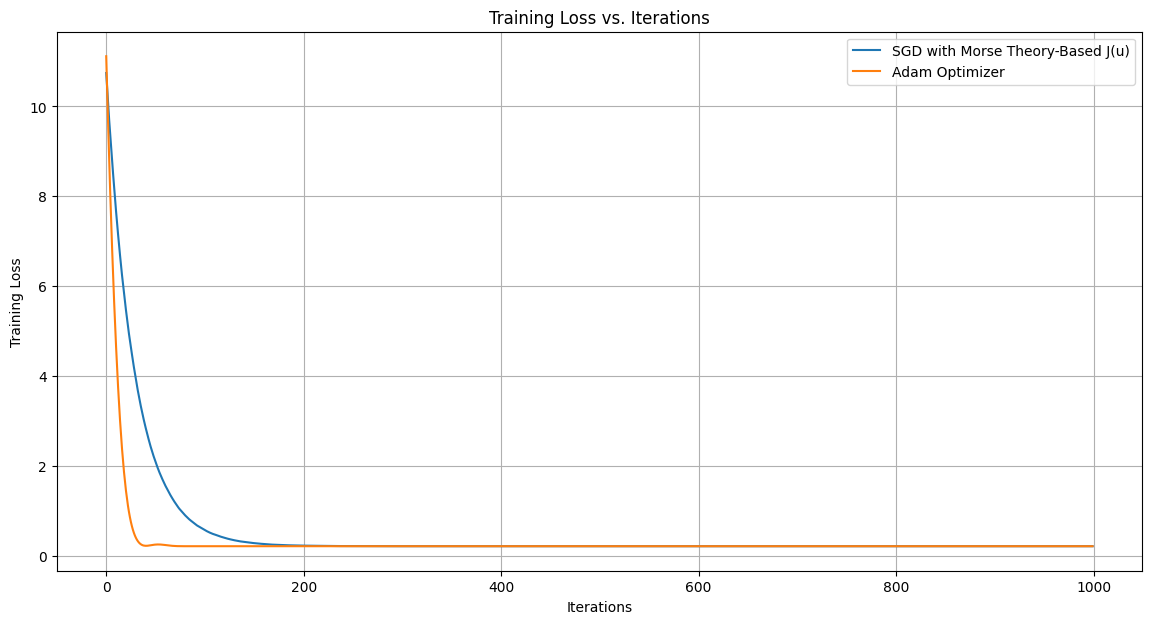

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)
x = np.random.randn(100)
y = 2 * x + 3 + np.random.randn(100) * 0.5  # true slope is 2, intercept is 3

def compute_gradient(params, x, y):
    slope, intercept = params
    y_pred = slope * x + intercept
    error = y_pred - y
    gradient_slope = 2 * np.mean(error * x)
    gradient_intercept = 2 * np.mean(error)
    return np.array([gradient_slope, gradient_intercept])

def compute_hessian(params, x, y):
    slope, intercept = params
    hessian_slope_slope = 2 * np.mean(x**2)
    hessian_slope_intercept = 2 * np.mean(x)
    hessian_intercept_intercept = 2 * np.mean(1)
    return np.array([[hessian_slope_slope, hessian_slope_intercept],
                     [hessian_slope_intercept, hessian_intercept_intercept]])

def identify_critical_point(H):
    eigenvalues, eigenvectors = np.linalg.eig(H)
    if np.all(eigenvalues > 0):
        return 'min', eigenvalues, eigenvectors
    elif np.all(eigenvalues < 0):
        return 'max', eigenvalues, eigenvectors
    else:
        return 'saddle', eigenvalues, eigenvectors

def J(u, gradient, H):
    critical_point_type, eigenvalues, eigenvectors = identify_critical_point(H)
    if critical_point_type == 'saddle':
        alpha = 1.5
        modified_gradient = gradient.copy()
        for i, eigenvalue in enumerate(eigenvalues):
            if eigenvalue > 0:
                direction = eigenvectors[:, i]
                modified_gradient += alpha * np.dot(gradient, direction) * direction
        return modified_gradient
    elif critical_point_type == 'min':
        beta = 0.1
        perturbation = np.random.normal(0, 1, gradient.shape)
        return gradient + beta * perturbation
    elif critical_point_type == 'max':
        return gradient
    else:
        return gradient

def update_parameters(params, gradient, learning_rate, H):
    modified_gradient = J(params, gradient, H)
    return params - learning_rate * modified_gradient

def SGD_with_Morse_Ju(x, y, initial_params, iterations, learning_rate):
    params = initial_params
    losses = []
    for i in range(iterations):
        gradient = compute_gradient(params, x, y)
        Hessian = compute_hessian(params, x, y)
        params = update_parameters(params, gradient, learning_rate, Hessian)
        y_pred = params[0] * x + params[1]
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)
        if i % 100 == 0:
            print(f"Iteration {i}: params = {params}, Loss = {loss:.4f}")
    return params, losses

initial_params = np.array([0.0, 0.0])
iterations = 1000
learning_rate = 0.01

print("SGD with Morse Theory-Based J(u):")
optimized_params, losses_sgd_morse = SGD_with_Morse_Ju(x, y, initial_params, iterations, learning_rate)
print(f"Optimized parameters: {optimized_params}")

# Adam Optimizer Class
class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.t = 0

    def update(self, w, dw):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * dw
        self.v = self.beta2 * self.v + (1 - self.beta2) * (dw ** 2)

        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        w = w - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return w

print("\nAdam Optimizer:")
# Initialize parameters
m = 0.0
b = 0.0

# Create optimizer
optimizer_m = AdamOptimizer(learning_rate=0.1)
optimizer_b = AdamOptimizer(learning_rate=0.1)

# Training loop
losses_adam = []
for epoch in range(1000):
    # Predicted values
    y_pred = m * x + b
    # Compute gradients
    grad_m = np.mean(2 * (y_pred - y) * x)
    grad_b = np.mean(2 * (y_pred - y))
    # Update parameters
    m = optimizer_m.update(m, grad_m)
    b = optimizer_b.update(b, grad_b)
    
    loss = np.mean((y_pred - y) ** 2)
    losses_adam.append(loss)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, m: {m:.4f}, b: {b:.4f}")

# Final parameters and loss
print(f"Final parameters - Slope: {m:.4f}, Intercept: {b:.4f}")

# Plotting the training losses
plt.figure(figsize=(14, 7))
plt.plot(losses_sgd_morse, label="SGD with Morse Theory-Based J(u)")
plt.plot(losses_adam, label="Adam Optimizer")
plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.title("Training Loss vs. Iterations")
plt.legend()
plt.grid(True)
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=756a2cf6-30bf-4d75-a01b-fc300f6f9700' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>